In [2]:
from scipy import optimize, stats
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
fun = lambda x: 6 * x[0] ** 6 + 2 * x[0] ** 4 * x[1] ** 2 + 10 * x[0] ** 2 + \
6 * x[0] * x[1] + 10 * x[1] ** 2 - 6 * x[0] + 4

In [4]:
def minimize(function, x0, method, maxiter, bounds=None):
    """Минимизирует заданную функцию"""
    return optimize.minimize(function, x0, method=method,
                             options={'ftol': 1e-10, 'eps': 1e-7, 'maxiter': maxiter}, 
                             bounds=bounds if bounds else None)

In [5]:
def draw_contourf(figsize, min_x, bounds=None):
    """Рисует контурный график (закрашенный между контурами) от 2-ух переменных"""
    point_x1, point_x2 = min_x
    plt.subplots(figsize=figsize, dpi=100)
    plt.title('Таргет')

    x, y = np.arange(bounds[0][0] * 1.2, bounds[0][1] * 1.2, 0.01), \
           np.arange(bounds[1][0] * 1.2, bounds[1][1] * 1.2, 0.01)

    xx, yy = np.meshgrid(x, y, sparse=True)
    z = fun(np.array([xx, yy]))

    cs = plt.contourf(x, y, z, 30, cmap='viridis_r', alpha=1)
    plt.clabel(cs, colors='k', inline=False, fontsize=7)
    plt.colorbar()

    plt.scatter(point_x1, point_x2, c='darkred', s=50)

    plt.grid(color='k', linewidth=0.5)

    plt.xticks(np.arange(x[0], x[-1] + 0.01, 1))
    plt.yticks(np.arange(y[0], y[-1] + 0.01, 1))

    plt.xlim(x[0], x[-1])
    plt.ylim(y[0], y[-1])

    # print(point_x1, point_x2)

    plt.axhline(0, color='k', linewidth=1.5)
    plt.axvline(0, color='k', linewidth=1.5)
    plt.hlines(bounds[1][0], bounds[0][0], bounds[0][1], color='orangered')
    plt.hlines(bounds[1][1], bounds[0][0], bounds[0][1], color='orangered')
    plt.vlines(bounds[0][1], bounds[1][0], bounds[1][1], color='orangered')
    plt.vlines(bounds[0][0], bounds[1][0], bounds[1][1], color='orangered')

    plt.xlabel(r'$x1$')
    plt.ylabel(r'$x2$')
    # plt.axis('off')
    plt.show()

In [6]:
x0 = (0, 0)

In [7]:
m1 = minimize(function=fun, x0=x0, method="Nelder-Mead", maxiter=1000)

print(f"f({m1.x[0]}; {m1.x[1]}) = {m1.fun}\n")

f(0.3225588275268471; -0.09655913591908051) = 3.018409317619074



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: OptimizeWarning: Unknown solver options: eps
  """


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


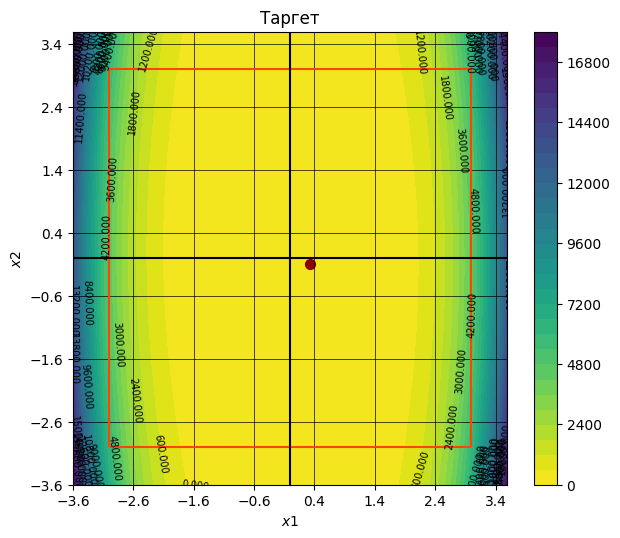

In [8]:
draw_contourf(figsize=(7, 6), min_x=m1.x, bounds=((-3, 3), (-3, 3)))

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [10]:
x = tf.Variable(2, name='x', dtype=tf.float32)
y = tf.Variable(1, name='y', dtype=tf.float32)

In [11]:
x, y

(<tf.Variable 'x:0' shape=() dtype=float32_ref>,
 <tf.Variable 'y:0' shape=() dtype=float32_ref>)

In [12]:
fx = tf.nn.l2_loss(6 * tf.pow(x, 6) + 2 * tf.multiply(tf.pow(x, 4), tf.pow(y, 2)) + 10 * tf.pow(x, 2) + 6 * tf.multiply(x, y) + 10 * tf.pow(y, 2) - 6 * x + 4)

In [14]:
opt = tf.train.AdamOptimizer(0.001).minimize(fx)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(30000):
        _, x1, x2 = sess.run([opt, x, y])
        if i % 100 == 0:
            print(f'Итерация: {i}, x = {np.array([x1, x2])}')
        #  sess.run(opt)

Итерация: 0, x = [1.999 0.999]
Итерация: 100, x = [1.9078368 0.9074414]
Итерация: 200, x = [1.8361341 0.8344355]
Итерация: 300, x = [1.7779497  0.77431357]
Итерация: 400, x = [1.7292594 0.7232666]
Итерация: 500, x = [1.6875274 0.6789039]
Итерация: 600, x = [1.651075  0.6396443]
Итерация: 700, x = [1.6187416  0.60439414]
Итерация: 800, x = [1.5896995 0.5723703]
Итерация: 900, x = [1.5633359 0.5429932]
Итерация: 1000, x = [1.5391904 0.5158249]
Итерация: 1100, x = [1.5169059  0.49052522]
Итерация: 1200, x = [1.4962028 0.4668258]
Итерация: 1300, x = [1.4768565  0.44451204]
Итерация: 1400, x = [1.4586877  0.42340893]
Итерация: 1500, x = [1.4415466  0.40337232]
Итерация: 1600, x = [1.4253093  0.38428208]
Итерация: 1700, x = [1.4098729 0.3660377]
Итерация: 1800, x = [1.3951491 0.3485536]
Итерация: 1900, x = [1.381063  0.3317567]
Итерация: 2000, x = [1.3675517  0.31558415]
Итерация: 2100, x = [1.3545586 0.2999815]
Итерация: 2200, x = [1.3420358 0.2849013]
Итерация: 2300, x = [1.3299407 0.27030

In [15]:
np.array([x1, x2])

array([ 0.3225572 , -0.09655809], dtype=float32)